![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Aeolis workshop material Copyright (c) 2017, Bas Hoonhout </div>
<div style="text-align: right"> 2023, Aeolis developer team </div>



# Purpose

This notebook reproduces figure ?? in de Vries et al 2023.

# Run AeoLiS to generate data

- Leave this notebook and switch to your terminal.
- Navigate to the model schematizations.
- Run the following command:

  ``aeolis Run1.txt``


If it is done you can continue reading the model output!

notes during my models setup:
- let's start with a 100m wide beach with a 20m intertidal zone which is consistent with de Vries et. al. 2014.
- let's add an alonshore dimension of 1000m.


In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import animation


In [12]:
%matplotlib notebook

In [14]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:10,0:100]
# save grid to files
np.savetxt('x_grid.txt',x_grid,fmt='%.d')
np.savetxt('y_grid.txt',y_grid,fmt='%.d')
np.savetxt('z_grid.txt',np.zeros(np.shape(x_grid)),fmt='%.d')


supply = np.zeros(np.shape(x_grid)) 
#supply[:,0:20] = 0.00006
supply[:,0:21] = 0.0005

np.savetxt('supply_file.txt',supply,fmt='%.5f')


#generate windfile
angle = 45.
speed = 10.
np.savetxt('wind.txt',[[0, 8, angle],
                       [40, 8, angle],
                       [41, 6, angle],
                       [55, 6, angle],
                       [56, 9, angle],
                       [300, 9, angle]],
                       fmt=('%.d %.d %.d'))

# np.savetxt('wind.txt',[[0, speed, angle],[10, speed, angle]], fmt=('%.d %.d %.d'))





(88, 10, 100, 1, 1)


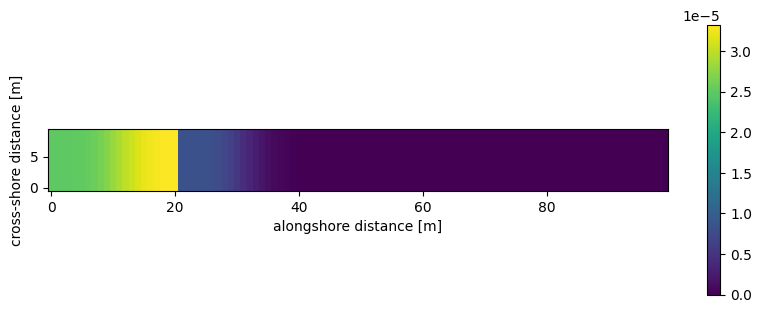

In [10]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['mass'][...]
    #pickup = ds.variables['pickup_sum'][...]
    print(Ct.shape)
    
    # create figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    # plot bed levels and bed level change
    p = ax.pcolormesh(x, y, Ct[2,:,:,0,0])
    cb = fig.colorbar(p, shrink=.7)
    
    #ax.contour(y, x, zb[0,:,:], [0.], colors=['k'])
        
    ax.set_aspect('equal', adjustable='box')
            
    ax.set_xlabel('alongshore distance [m]')
    ax.set_ylabel('cross-shore distance [m]')




0.009499656967818737
0.009536895900964737


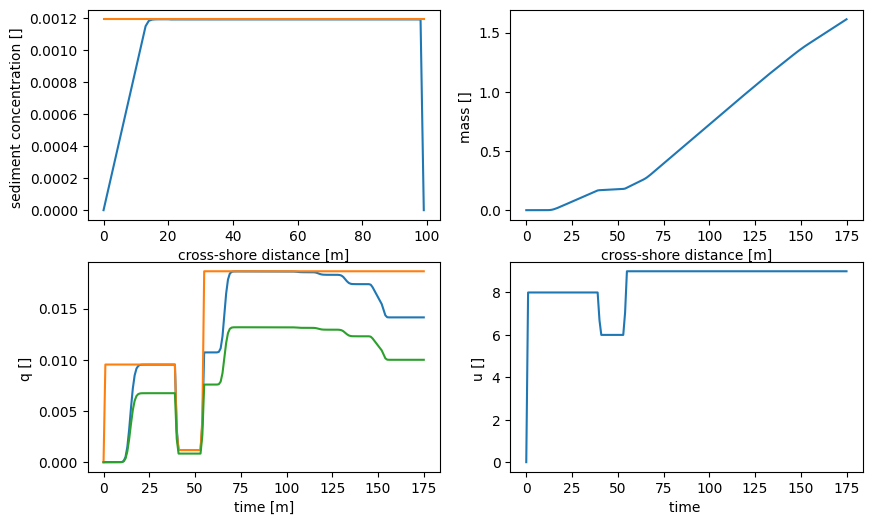

In [6]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    qs= ds.variables['qs'][...]
    qn= ds.variables['qn'][...]

    q= ds.variables['q'][...]


    
    # create figure
    fig, ax = plt.subplots(2,2,figsize=(10,6))
    
    ax[0,0].plot(np.transpose(Ct[35,5,:,0]))
    ax[0,0].plot(np.transpose(Cu[35,5,:,0]))
    ax[0,0].set_ylabel('sediment concentration [] ')
    ax[0,0].set_xlabel('cross-shore distance [m]')
    
    #ax[0,1].plot(np.transpose(mass[:,5,:,0,0]))#-supply[5,:]))
    ax[0,1].plot(qs[:,5,-2,0].cumsum())#-supply[5,:]))
    ax[0,1].set_ylabel('mass [] ')
    ax[0,1].set_xlabel('cross-shore distance [m]')
    
        
    ax[1,0].plot(q[:,5,-2,0])
    ax[1,0].plot(Cu[:,5,-2,0]*uw[:,5,-2])
    ax[1,0].plot(qs[:,5,-2,0])
    print(q[20,5,-2,0])
    print(Cu[20,5,-2,0]*uw[20,5,-2])
    
    ax[1,0].set_ylabel('q [] ')
    ax[1,0].set_xlabel('time [m]')    
                     
    ax[1,1].plot(uw[:,5,-2])
    #ax[1,1].plot(mass[:,5,19,0,0])
    ax[1,1].set_ylabel('u [] ')
    ax[1,1].set_xlabel('time ')

0.009499656967818737
0.009536895900964737


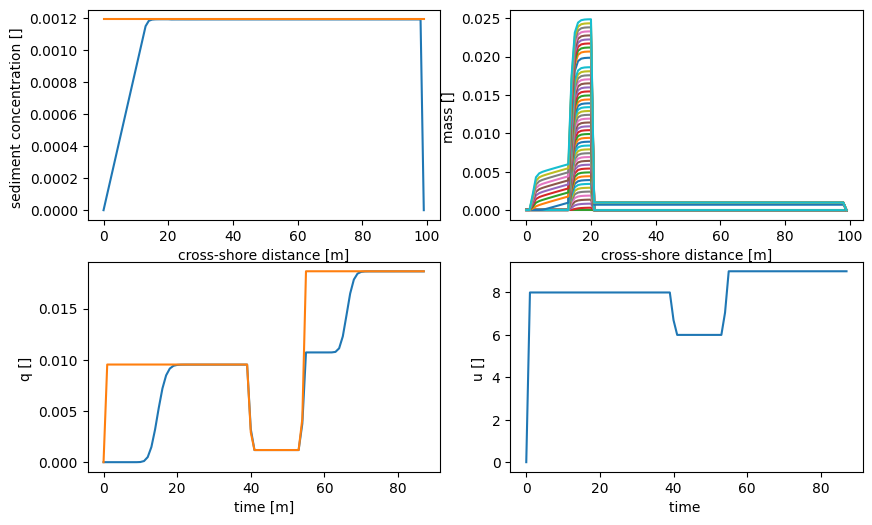

In [5]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    q= ds.variables['q'][...]
    u= ds.variables['u'][...]
    #rint(uth)

    #pickup = ds.variables['pickup_sum'][...]
    #print(np.squeeze(zb).shape)
    #print(q.shape)
    
    # create figure
    fig, ax = plt.subplots(2,2,figsize=(10,6))
    
   # ax[0,0].plot(np.transpose(Ct[85,5,:,0]))
    #ax[0,0].plot(np.transpose(Cu[85,5,:,0]))    
   # ax[0,0].plot(np.transpose(Ct[38,5,:,0]))
   # ax[0,0].plot(np.transpose(Cu[38,5,:,0]))    
    ax[0,0].plot(np.transpose(Ct[35,5,:,0]))
    ax[0,0].plot(np.transpose(Cu[35,5,:,0]))
    ax[0,0].set_ylabel('sediment concentration [] ')
    ax[0,0].set_xlabel('cross-shore distance [m]')
    
#    ax[0,1].plot(np.transpose(mass[1:10,50,:,0,0]-supply[50,:]))
    ax[0,1].plot(np.transpose(mass[0:50,5,:,0,0]))#-supply[5,:]))
    #ax[0,1].plot(np.transpose((supply[5,:])))
    ax[0,1].set_ylabel('mass [] ')
    ax[0,1].set_xlabel('cross-shore distance [m]')
    
        
    ax[1,0].plot(q[:,5,-2,0])
    ax[1,0].plot(Cu[:,5,-2,0]*u[:,5,-2,0])
    print(q[20,5,-2,0])
    print(Cu[20,5,-2,0]*u[20,5,-2,0])
    
    ax[1,0].set_ylabel('q [] ')
    ax[1,0].set_xlabel('time [m]')    
                     
    ax[1,1].plot(u[:,5,0])
    #ax[1,1].plot(mass[:,5,19,0,0])
    ax[1,1].set_ylabel('u [] ')
    ax[1,1].set_xlabel('time ')

<IPython.core.display.Javascript object>


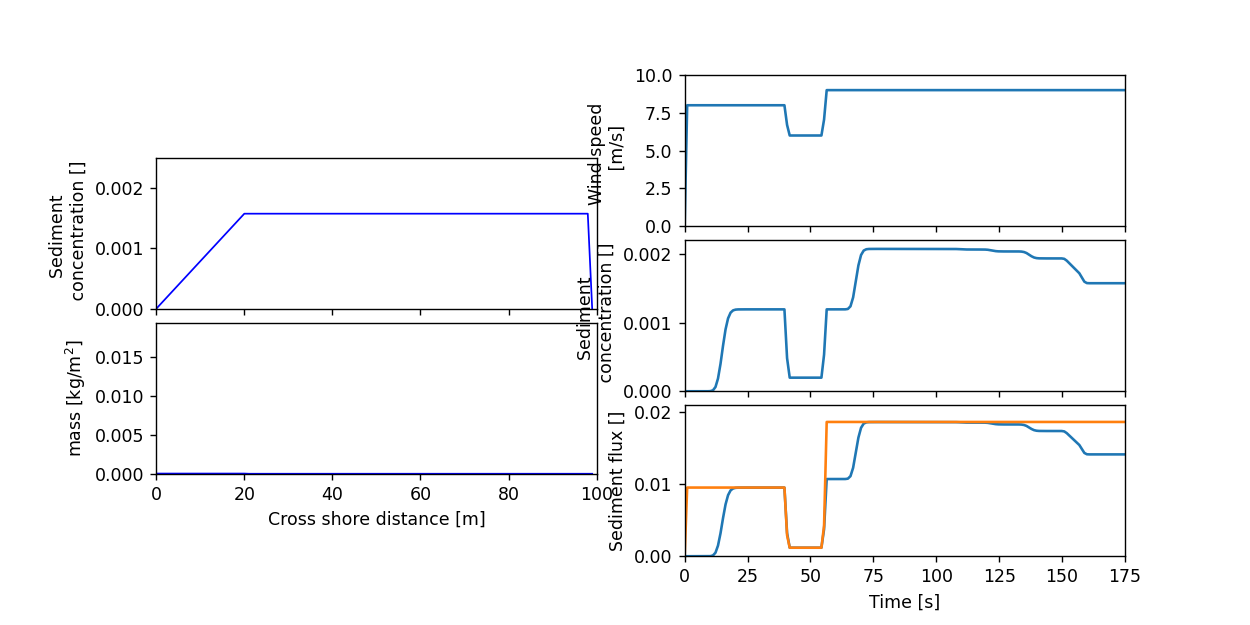

In [15]:

#plots 
fig = plt.figure(figsize=(14, 6))
gs = plt.GridSpec(nrows=6, ncols=2)

ax0 = fig.add_subplot(gs[1:3, 0])
ax0.set_xlim(( 0, 100))            
ax0.set_ylim((0, 0.0025))
ax0.set_ylabel('Sediment \n concentration []')
#ax0.set_xlabel(None)
line1, = ax0.plot([], [], 'b', lw=1) 
ax0.set_yticks([0,0.001,0.002])
ax0.set_xticklabels([])

ax1 = fig.add_subplot(gs[3:5, 0])
ax1.set_xlim(( 0, 100))            
ax1.set_ylim((0, 0.0195))
ax1.set_ylabel('mass [kg/m$^2$]')
ax1.set_xlabel('Cross shore distance [m]')
line2, = ax1.plot([], [], 'b', lw=1) 

ax2 = fig.add_subplot(gs[0:2, 1])
ax2.plot(t,uw[:,5,0])
ax2.set_ylabel('Wind speed \n [m/s]')
ax2.set_xticklabels([])
ax2.set_ylim([0, 10])
ax2.set_xlim([0, 175])

line3, = ax2.plot([], [], 'r', lw=1) 

ax3 = fig.add_subplot(gs[2:4, 1])
ax3.plot(t,Ct[:,5,-2,0])
ax3.set_ylabel('Sediment \n concentration []')
ax3.set_xticklabels([])
#ax3.yticks([0.001])
ax3.set_yticks([0,0.001,0.002])
ax3.set_ylim([0, 0.0022])
ax3.set_xlim([0, 175])

line4, = ax3.plot([], [], 'r', lw=1) 

ax4 = fig.add_subplot(gs[4:6, 1])
ax4.plot(t,q[:,5,-2,0])
ax4.plot(t,Cu[:,5,-2,0]*uw[:,5,-2])
ax4.set_ylabel('Sediment flux []')
ax4.set_xlabel('Time [s]')
ax4.set_ylim([0, 0.021])
ax4.set_xlim([0, 175])
line5, = ax4.plot([], [], 'r', lw=1) 



def drawframe(n,*fargs):
    #print(n)
    #print(Ct[n,5,:,0].shape)
    line1.set_data(x[5,:],Ct[n,5,:,0])
    line2.set_data(x[5,:],mass[n,5,:,0])
    line3.set_data((t[n],t[n]),(0,10))
    line4.set_data((t[n],t[n]),(0,0.003))
    line5.set_data((t[n],t[n]),(0,0.02))
    
    
    return line1,line2,line3,line4,line5,

fig.set_size_inches(10, 5)
anim = animation.FuncAnimation(fig, drawframe, fargs=("Ct","mass","t","x"), frames=t.size-1, interval=200, blit=True, repeat=False )


In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())